# Linear regression analysis (example 2)

### Load packages and datasets

In [26]:
# Load HSAUR3 package
library(HSAUR3)

# Verify 
(.packages())

[1] "HSAUR3"    "tools"     "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"

In [27]:
# Load the clouds dataset
data("clouds", package = "HSAUR3")

### Visualization

In [28]:
# Look at the dataset
clouds

seeding,time,sne,cloudcover,prewetness,echomotion,rainfall
no,0,1.75,13.4,0.274,stationary,12.85
yes,1,2.70,37.9,1.267,moving,5.52
yes,3,4.10,3.9,0.198,stationary,6.29
no,4,2.35,5.3,0.526,moving,6.11
yes,6,4.25,7.1,0.250,moving,2.45
no,9,1.60,6.9,0.018,stationary,3.61
no,18,1.30,4.6,0.307,moving,0.47
no,25,3.35,4.9,0.194,moving,4.56
no,27,2.85,12.1,0.751,moving,6.35
yes,28,2.20,5.2,0.084,moving,5.06


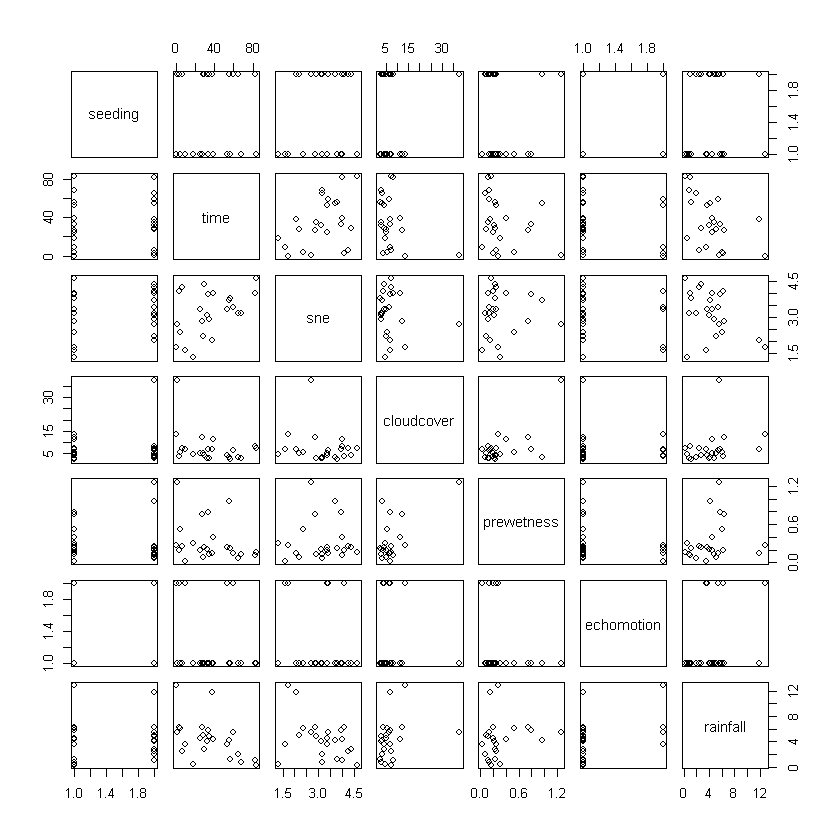

In [29]:
plot(clouds)

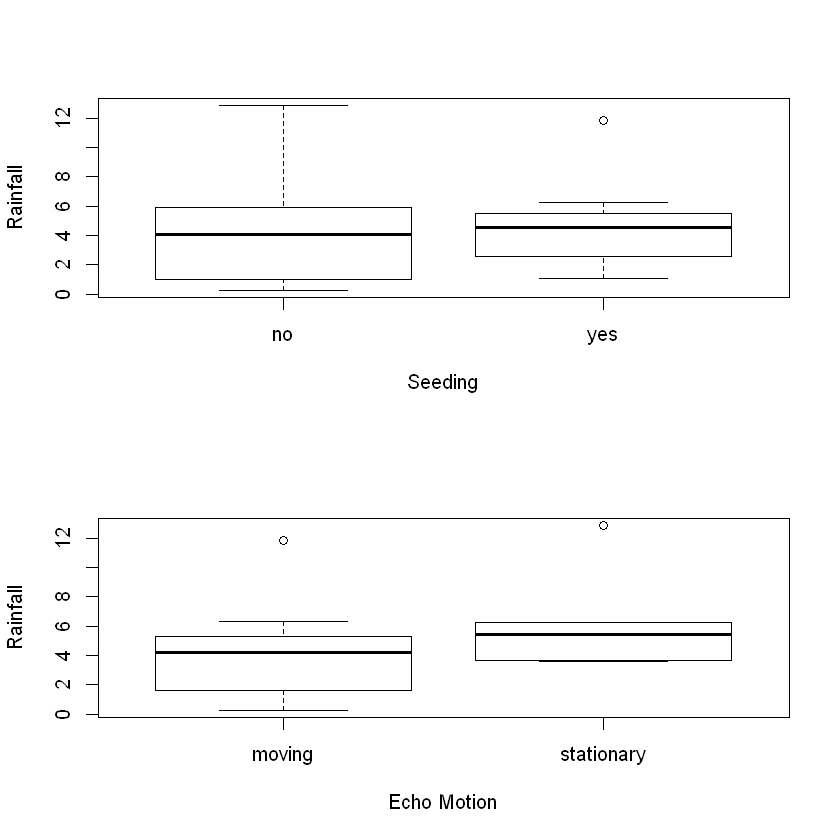

In [30]:
layout(matrix(1:2, nrow = 2))
bxpseeding <- boxplot(rainfall ~ seeding, data = clouds, ylab = "Rainfall", xlab = "Seeding") 
bxpecho <- boxplot(rainfall ~ echomotion, data = clouds, ylab = "Rainfall", xlab = "Echo Motion")

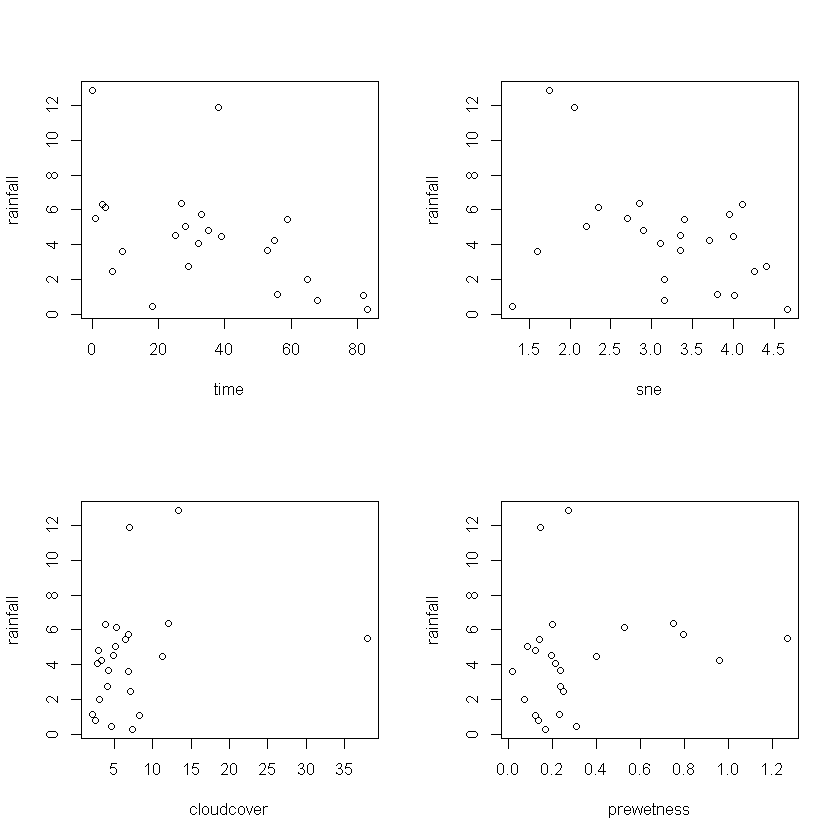

In [31]:
layout(matrix(1:4, nrow = 2)) 
plot(rainfall ~ time, data = clouds) 
plot(rainfall ~ cloudcover, data = clouds) 
plot(rainfall ~ sne, data = clouds) 
plot(rainfall ~ prewetness, data = clouds) 

### Fit a model

Define the regression formula, for more information on the syntax, refer to http://faculty.chicagobooth.edu/richard.hahn/teaching/formulanotation.pdf . 

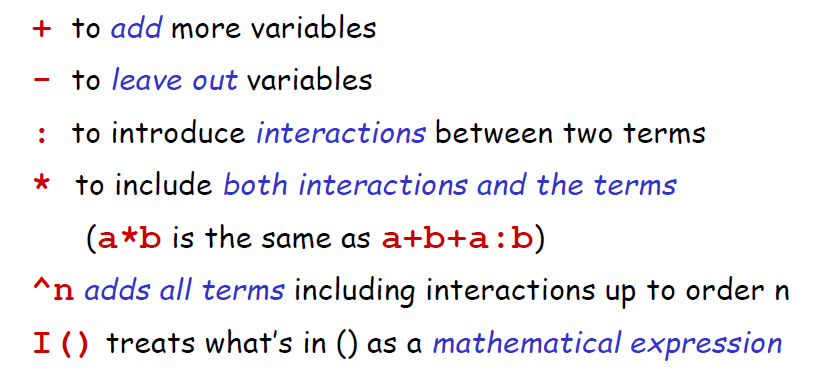

In [52]:
clouds.formula <- rainfall ~ seeding + seeding:(sne + cloudcover + prewetness + echomotion) + time 

In [53]:
clouds.lm <- lm(clouds.formula, data = clouds)

Check the value of coefficients.

In [54]:
coef(clouds.lm)

(Intercept)                      seedingyes 
                    -0.34624093                     15.68293481 
                           time                   seedingno:sne 
                    -0.04497427                      0.41981393 
                 seedingyes:sne            seedingno:cloudcover 
                    -2.77737613                      0.38786207 
          seedingyes:cloudcover            seedingno:prewetness 
                    -0.09839285                      4.10834188 
          seedingyes:prewetness  seedingno:echomotionstationary 
                     1.55127493                      3.15281358 
seedingyes:echomotionstationary 
                     2.59059513

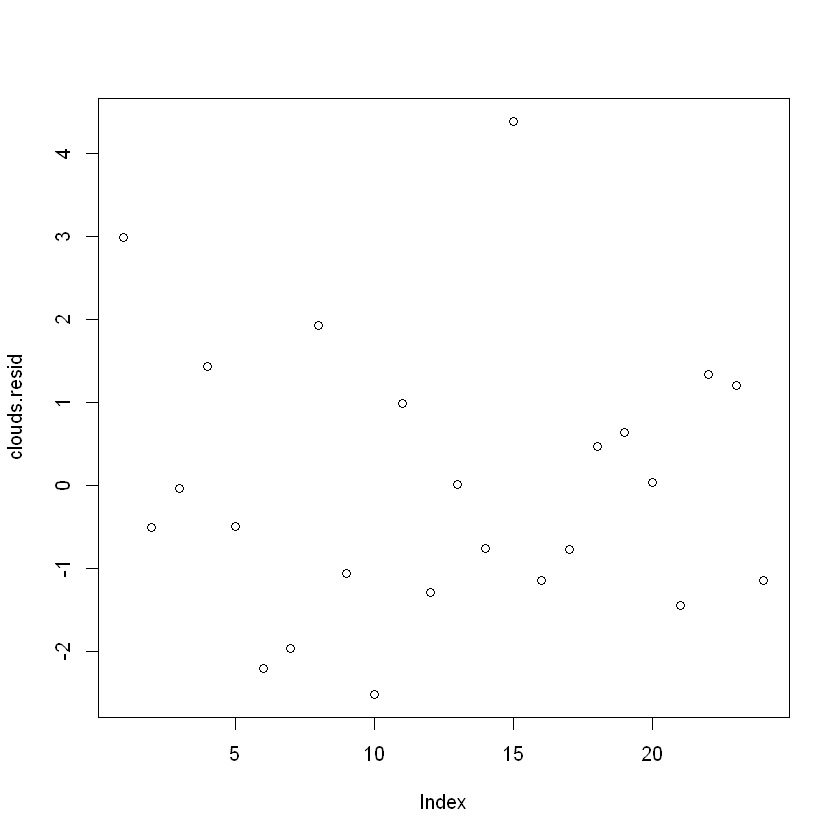

In [55]:
clouds.resid <- residuals(clouds.lm) 
plot(clouds.resid)

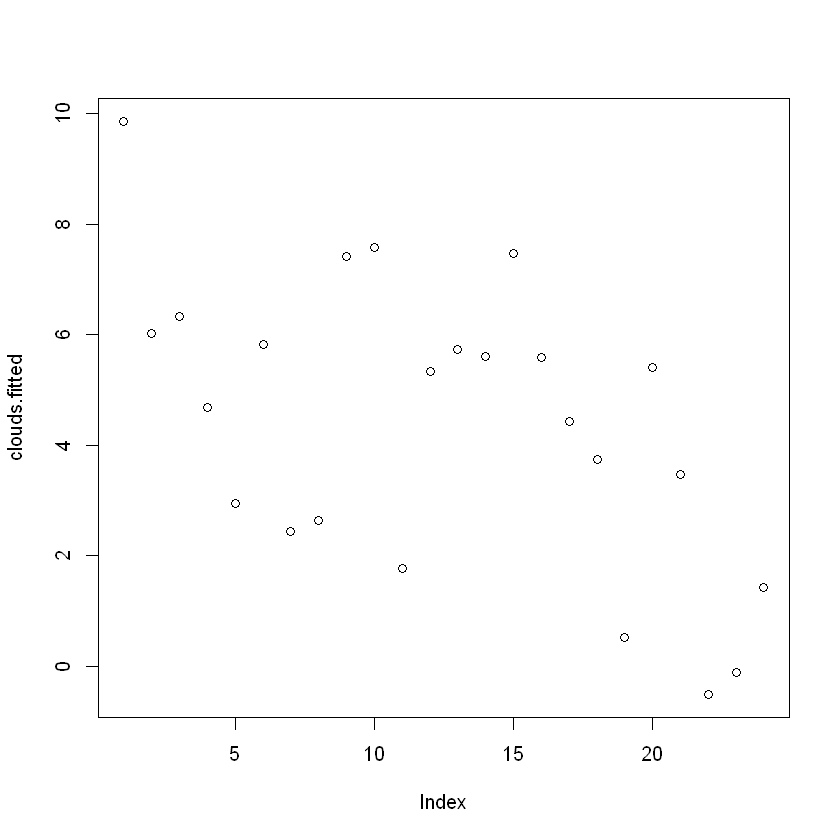

In [56]:
clouds.fitted <- fitted(clouds.lm)
plot(clouds.fitted)

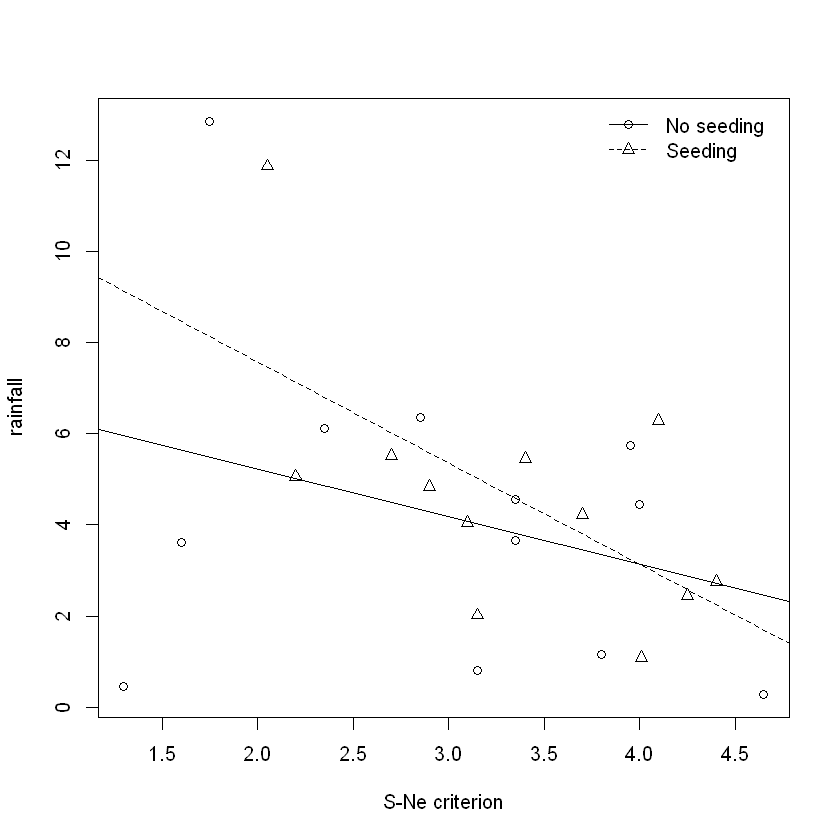

In [59]:
layout(1)
psymb <- as.numeric(clouds$seeding) 
plot(rainfall ~ sne, data = clouds, pch = psymb, xlab = "S-Ne criterion")

# Fit a linear model using a subset of the data where seeding == "no"
abline(lm(rainfall ~ sne, data = clouds, subset = seeding == "no"))


# Fit a linear model using a subset of the data where seeding == "yes"
abline(lm(rainfall ~ sne, data = clouds, subset = seeding == "yes"), lty = 2) 
legend("topright", legend = c("No seeding", "Seeding"), pch = 1:2, lty = 1:2, bty = "n")